<a href="https://colab.research.google.com/github/hantaro00/Predict_Bier_sp/blob/main/Bier_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importação dos pacotes que iremos usar.
No decorrer do projeto, podemos voltar aqui e importar novos pacotes.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import scipy as spy
import numpy as np

sns.set_style('darkgrid')
sns.set_context('talk')
sns.set_palette('rainbow')
import plotly.express as px

Importando nosso dataset CSV direto do Drive

In [2]:

df = pd.read_csv('/content/drive/MyDrive/Projeto_Consumo_cerveja/Consumo_cerveja.csv')

verificando os valores Nulos

In [3]:

df.isnull().sum()

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64

Deletando os valores Nulos

In [4]:

df.dropna(inplace=True)

Verificando se ainda há valores Nulos

In [ ]:

df.isnull().sum()

Data                           0
Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
dtype: int64

Quantos registros temos no nosso dataframe?

In [5]:

df.shape

(365, 7)

Vamos ver que tipo de dados temos nos registros.

In [6]:

df.dtypes

Data                            object
Temperatura Media (C)           object
Temperatura Minima (C)          object
Temperatura Maxima (C)          object
Precipitacao (mm)               object
Final de Semana                float64
Consumo de cerveja (litros)    float64
dtype: object

Vamos mudar a formatação de "Separado por vírvula" por "Separado por ponto" nas colunas.

In [7]:

df['Temperatura Media (C)'] = df['Temperatura Media (C)'].apply(lambda x: str(x).replace(",", "."))
df['Temperatura Minima (C)'] = df['Temperatura Minima (C)'].apply(lambda x: str(x).replace(",", "."))
df['Temperatura Maxima (C)'] = df['Temperatura Maxima (C)'].apply(lambda x: str(x).replace(",", "."))
df['Precipitacao (mm)'] = df['Precipitacao (mm)'].apply(lambda x: str(x).replace(",", "."))

Agora vamos converter os valores de strings para flutuantes e inteiros.

In [8]:

df['Temperatura Media (C)'] = df['Temperatura Media (C)'].astype('float64')
df['Temperatura Minima (C)'] = df['Temperatura Minima (C)'].astype('float64')
df['Temperatura Maxima (C)'] = df['Temperatura Maxima (C)'].astype('float64')
df['Precipitacao (mm)'] = df['Precipitacao (mm)'].astype('float64')
df['Final de Semana'] = df['Final de Semana'].astype('int32')

Convertendo o tipo dos registros da coluna "Data"

In [9]:

df['Data'] = pd.to_datetime(df['Data'])

Conferindo se os tipos foram alterados.

In [10]:

df.dtypes

Data                           datetime64[ns]
Temperatura Media (C)                 float64
Temperatura Minima (C)                float64
Temperatura Maxima (C)                float64
Precipitacao (mm)                     float64
Final de Semana                         int32
Consumo de cerveja (litros)           float64
dtype: object

Agora que demos um 'trato' no nosso dataframe, vamos dar uma olhada nos primeiros registros.

In [11]:

df.head(5)

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0,28.900


Agora vamos começar com algumas plotagens.
Primeiro, vou agrupar o consumo por mês.

In [12]:

consumo_mensal = df.groupby(df['Data'].dt.month)['Consumo de cerveja (litros)'].sum()

Primeiro Plot

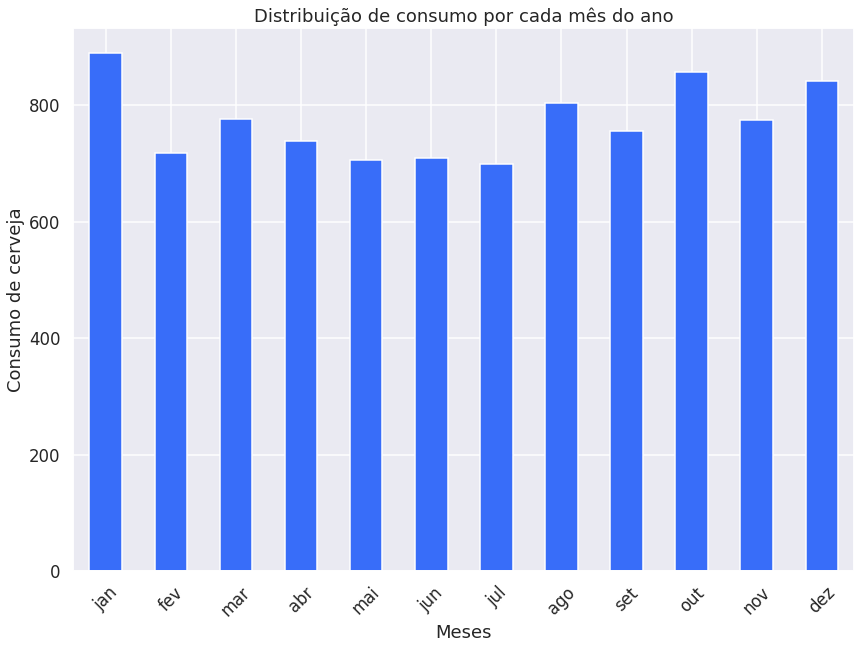

In [24]:

vr =  consumo_mensal.plot.bar(x='Data', y='consumo_mensal', )
plt.rcParams['figure.figsize']=(14, 10)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,], ['jan', 'fev', 'mar', 'abr',  
                                                     'mai', 'jun', 'jul', 'ago', 
                                                     'set', 'out', 'nov', 'dez'], rotation=45)


plt.title('Distribuição de consumo por cada mês do ano')
plt.xlabel('Meses')
plt.ylabel('Consumo de cerveja')
plt.show()

No grafico acima, podemos observar que o o consumo se mantém elevado de Agosto até Janeiro, devido à algumas festividades nesse período.

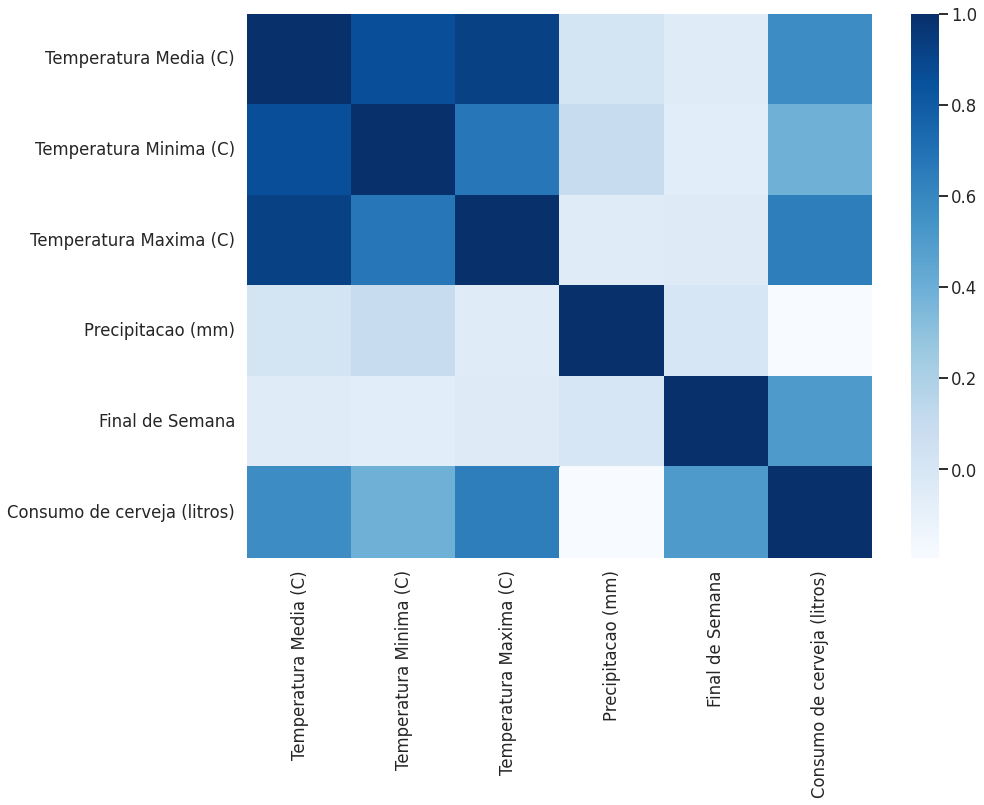

In [14]:
sns.heatmap(df.corr(), cmap='Blues' )

Usamos a Matriz de Correlação para tentar encontar padrões com relação entre variáveis.
A visualização com as cores almentando ou diminuindo a temperatura pode indicar fortes indícios de relação positiva ou negativa entre nossos objetos.
A princípio, Temperatura Máxima, Temperatura Média e Fim de Semana tem certa correlação com nosso consumo de cerveja.

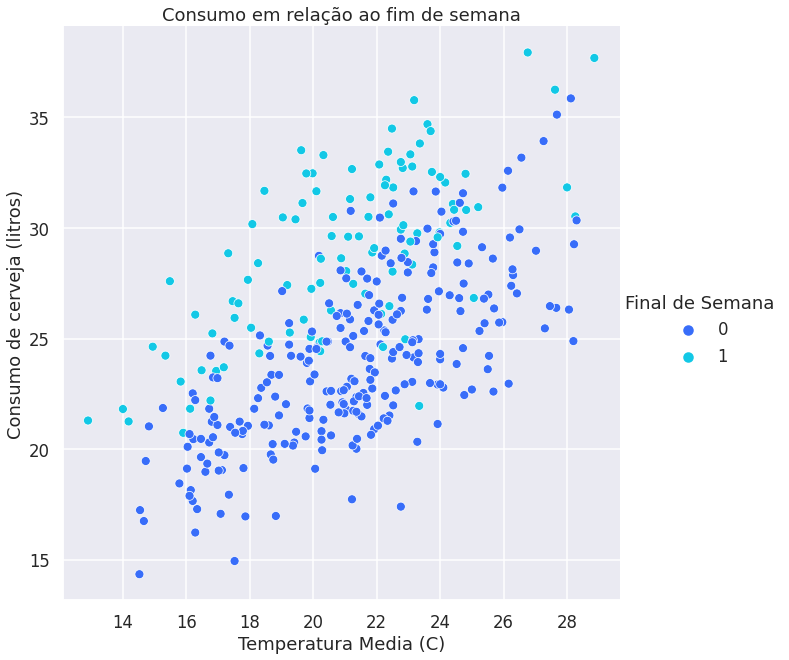

In [15]:

sns.relplot(x='Temperatura Media (C)', y='Consumo de cerveja (litros)', hue='Final de Semana', data=df, height=9, aspect=1);
plt.title('Consumo em relação ao fim de semana');

No gráfico de dispesão, plotado acima, nos é indicado que o consumo no fim de semana é consideravelmente maior que nos dias úteis.
Podemos ver também que existe certa relação com a temperatura alta X fim de semana, resultando no alto consumo de cerveja.

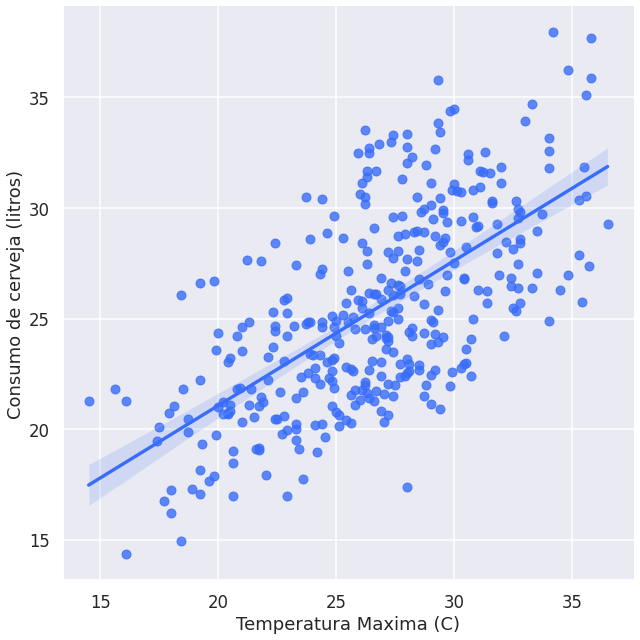

In [19]:
sns.lmplot(x='Temperatura Maxima (C)', y='Consumo de cerveja (litros)', data=df, height=9, aspect=1)
plt.show()

No plot acima, podemos ter noção de forma visual de como a regressão simples entre duas variáveis funciona.

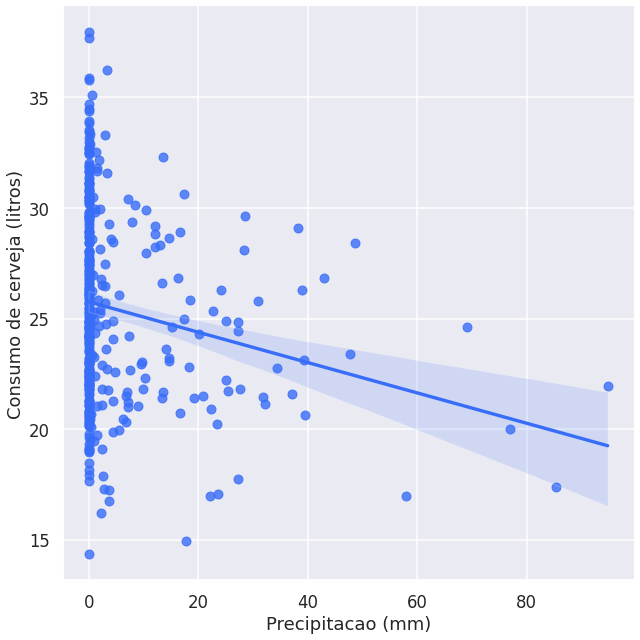

In [23]:
sns.lmplot(x='Precipitacao (mm)', y='Consumo de cerveja (litros)', data=df, height=9, aspect=1)
plt.show()

Assim como nesse outro gráfico que nos indica o que já era esperado: Quanto mais chuva, menos consumo temos.

In [16]:
fig1 = px.bar(x='Data', y='Consumo de cerveja (litros)', data_frame=df)
fig1.show()

Utilizando esse grafico interativo da Lib Plotly, podemos observar que o consumo se eleva no começo do mês, obviamente por conta do salário que é recebido, mas também no meio do mês, em meados do dia 15.
Isso não é por acaso, tendo em vista que muitas empresas depositam o adiantamento de salário, o infame "vale".

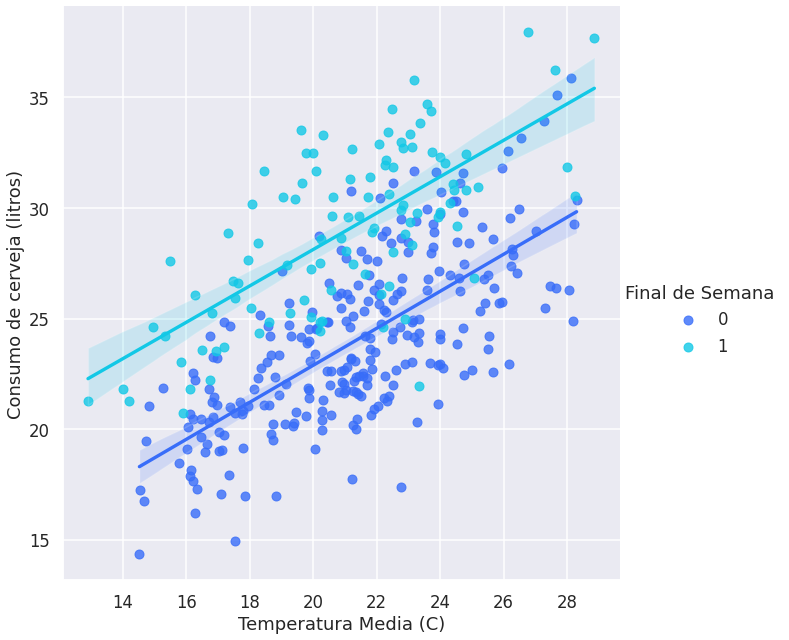

In [ ]:

sns.lmplot(x='Temperatura Media (C)', y='Consumo de cerveja (litros)', hue='Final de Semana', data=df, height=9, aspect=1);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



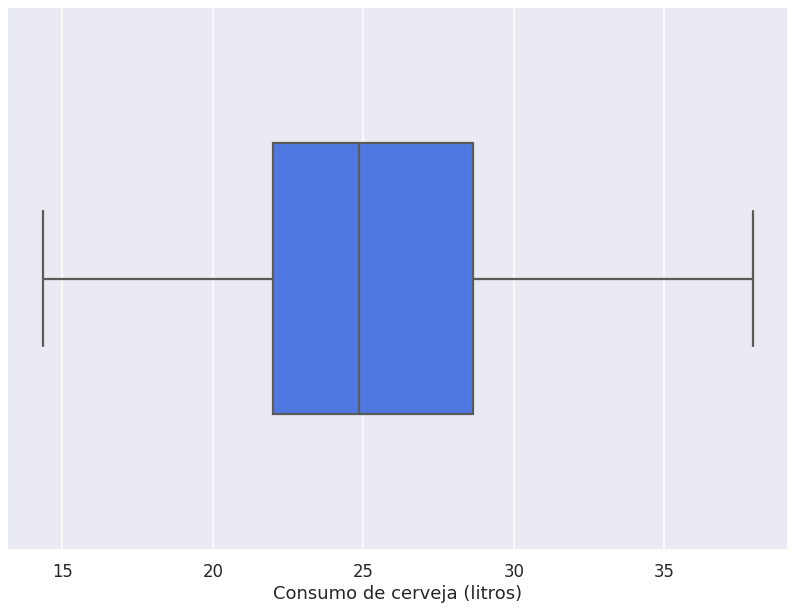

In [28]:
sns.boxplot(df['Consumo de cerveja (litros)'], width=0.5);

Logo acima, utilizamos um gráfico chamado de BoxPlot, onde é literalmente um gráfico de caixa, que nos mostra os valores mínimos, máximos, primeiro e terceiro quartil, assim como nos dá a informação que procuramos: OutLiers.

Esses pontos fora da curva podem atrapalhar qualquer algoritmo de regressão, por serem acontecimentos não frequentes, mudam o resultado, tirando a acurácia do nosso trabalho.

Por sorte, não tivemos OutLiers nos dados analisados.

##Aprendizado de Máquina

Partindo para a parte mais legal.
Vamos usar 4 diferentes algoritmos para fazer a predição do consumo de cerveja.
Para avaliar sua precisão, usaremos a métrica r2_score, onde quanto mais próximo de 100 for o resultado, mais precisa é a predição.

Importação de alguns pacotes importantantes

In [ ]:
from sklearn import model_selection
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

Separando nossos dados de treino e teste

In [ ]:
X = df[['Final de Semana', 'Temperatura Media (C)', 'Temperatura Maxima (C)']]
y = df['Consumo de cerveja (litros)']

In [ ]:
[X_train, X_test, y_train, y_test] = train_test_split(X, y, test_size=0.3)

## REGRESSÃO LINEAR MULTIPLA

In [ ]:
modelo = LinearRegression()
modelo = modelo.fit(X_train, y_train)

#Predição
y_predict = modelo.predict(X_test)

#Scores
print(r2_score(y_test, y_predict))
print(mean_squared_error(y_test, y_predict))

0.7118998167001329
5.008951369374771


## RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor
randomF = RandomForestRegressor()
randomF = randomF.fit(X_train, y_train)

#Predição
randomPred = randomF.predict(X_test)

#scores
print(r2_score(y_test, randomPred))
print(mean_squared_error(y_test, randomPred))

0.6042899844423968
6.879871444717277


##REGRESSÃO LASSO

In [ ]:
from sklearn.linear_model import Lasso

Lass = Lasso()
Lass = Lass.fit(X_train, y_train)

#Predição
lassPred = Lass.predict(X_test)

#Scores
print(r2_score(y_test, lassPred))
print(mean_squared_error(y_test, lassPred))

0.3561727150483872
11.193674102048757


##REGRESSÃO RIDGE

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge = ridge.fit(X_train, y_train)

#Predição
ridgePred = ridge.predict(X_test)

#Scores
print(r2_score(y_test, ridgePred))
print(mean_squared_error(y_test, ridgePred))


0.7095820344844439
5.049248665510484


Observamos que nossa clássica Regressão Linear Múltipla está quase lado a lado com a Ridge, levando assim o podium do nosso trabalho, com acerto de 71.1%.